In [ ]:
# command to download the dataset (covid_19) the specified URL
!wget http://cb.lk/covid_19


In [ ]:
# unzipping the dataset : covid_19
!unzip covid_19


In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
# CNN based model using keras (with tensorflow backend)
classifier = Sequential() # we have created an object(classifier:modle name) of class sequential() i.e we gonna add layer one by one
## we are using conv2D layer
## we are not using VGG layer because it works on around 180 million features so our model with very less dataset will definitely overfit
classifier.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape = (224,224,3)))
classifier.add(Conv2D(64,(3,3),activation = 'relu'))
# using 2 convolution layers of kernel size =(3,3) is similar to using one single convolution layer of kernal size =(5,5)
# but we don't perfer that becauser to increase non linearity in the model using more relu funtions
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25)) # to find overfitting in the model


classifier.add(Conv2D(64,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(128,(3,3),activation = 'relu'))
# as we go deep into model we are increasing the number of convolutional layer because we are going to extract large size
# features (i.e complex features)
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))

classifier.add(Flatten());
classifier.add(Dense(64,activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(1,activation = 'sigmoid'))


classifier.compile(loss = keras.losses.binary_crossentropy,optimizer = 'adam',metrics =['accuracy'])
# adam use gradient descent algorithm for optimizing

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
## training the model 
# firstly setting up the data ready for training i.e data preprocessing with the help of ImageDataGenerator
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
validation_datagen = image.ImageDataGenerator(rescale = 1./255)
# we are dividing by 255 for normalisation 

In [ ]:
train_data = train_datagen.flow_from_directory('CovidDataset/Train',
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'binary')
# here images get loaded one by one and get reshaped to specified dimensions


Found 224 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_data = validation_datagen.flow_from_directory('CovidDataset/Val',
                                               target_size = (224,224),
                                               batch_size = 32,
                                            class_mode = 'binary')
# here images get loaded one by one and get reshaped to specified dimensions

Found 60 images belonging to 2 classes.


In [ ]:
validation_data.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
final_model = classifier.fit_generator(train_data,
                          steps_per_epoch= 7,
                         epochs = 10,
                         validation_data = validation_data,
                         validation_steps = 2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
7/7 [==============================] - 60s 2s/step - loss: 2.4544 - accuracy: 0.5109 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 10s 1s/step - loss: 0.6694 - accuracy: 0.5805 - val_loss: 0.6588 - val_accuracy: 0.9333
Epoch 3/10
7/7 [==============================] - 10s 1s/step - loss: 0.6194 - accuracy: 0.6369 - val_loss: 0.5063 - val_accuracy: 0.8833
Epoch 4/10
7/7 [==============================] - 10s 1s/step - loss: 0.4704 - accuracy: 0.7643 - val_loss: 0.4836 - val_accuracy: 0.8500
Epoch 5/10
7/7 [==============================] - 10s 1s/step - loss: 0.3884 - accuracy: 0.8215 - val_loss: 0.1925 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 10s 1s/step - loss: 0.2847 - accuracy: 0.8927 - val_loss: 0.2570 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 10s 2s/step - loss: 0.3579 - accuracy: 0.8288 - val_loss: 0.1486 - val_accuracy: 0.9833
Epoch 8/10
7/7 [==================

In [ ]:
## with help of "grad CAM" technique we can see and visualize how our model is differentiating the features i.e on which 
## part of network our model is focusing on cilensing map
## can read about class activation

In [ ]:
## saving the model
classifier.save("COVID_19_model.h5")
##Through Keras, models can be saved in three formats:
#YAML format
#JSON format
#HDF5 format
#YAML and JSON files store only model structure, whereas, HDF5 file stores complete neural network model along with structure and weights. Therefore, if the model structure is saved using YAML or JSON format, weights should be stored in an HDF5 file to store the entire model.

In [ ]:
# we can load the model when ever required
classifier = load_model("COVID_19_model.h5")


In [ ]:
import os  # it is a standard library in python

In [ ]:
# setup for confusion matrix
y_validation = []
y_predict = []
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i,target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis = 0)
  pred = classifier.predict_classes(img)
  y_predict.append(pred[0,0])
  y_validation.append(1)
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i,target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis = 0)
  pred = classifier.predict_classes(img)
  y_predict.append(pred[0,0])
  y_validation.append(0)
y_validation = np.array(y_validation)
y_predict = np.array(y_predict)



/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# now importing sklearn for confusion matrix
from sklearn.metrics import confusion_matrix
# sklearn provides a selection of efficient tools for machine learning and statistical modeling 
#including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

con_matrix = confusion_matrix(y_validation,y_predict)

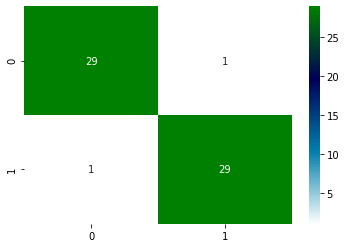

In [ ]:
import seaborn as sns
#Seaborn is an open-source Python library built on top of matplotlib. 
#It is used for data visualization and exploratory data analysis. 
#Seaborn works easily with dataframes and the Pandas library.

sns.heatmap(con_matrix,cmap = "ocean_r",annot = True)
# Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix
# cmap is for color map (ex : ocean, ocean_r, pink, pink_r, plasma )
# annot : When we pass bool ‘True‘ value to annot then the value will show on each cell of the heatmap.